In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pandas

Pandas has 2 primary data structures:
- Series: One dimensional - similar to vector/array.
- Data Frame: Two dimensional - similar to matrix.

## Series

In [25]:
s = pd.Series([2, 4, -12, 0, 2])
s

0     2
1     4
2   -12
3     0
4     2
dtype: int64

In [11]:
s.shape

(5,)

In [12]:
s.dtype

dtype('int64')

In [13]:
s.values  # returns numpy array

array([  2,   4, -12,   0,   2])

In [14]:
s[0]

2

In [16]:
s[1:3]

1     4
2   -12
dtype: int64

In [17]:
s[1:]

1     4
2   -12
3     0
4     2
dtype: int64

In [20]:
s[
    [True, True, False, False, True]
]  # boolean indexing, toggle visibility of each using boolean

0    2
1    4
4    2
dtype: int64

In [26]:
s * 2  # applied elementwise

0     4
1     8
2   -24
3     0
4     4
dtype: int64

In [28]:
s < 0  # elementwise comparisons

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [33]:
s[s > 0]  # applies boolean indexing to result of comparison

0    2
1    4
4    2
dtype: int64

In [34]:
s.sum()

-4

In [35]:
s.mean()

-0.8

In [36]:
s.unique()

array([  2,   4, -12,   0])

In [42]:
vc = s.value_counts().sort_index()
vc

-12    1
 0     1
 2     2
 4     1
Name: count, dtype: int64

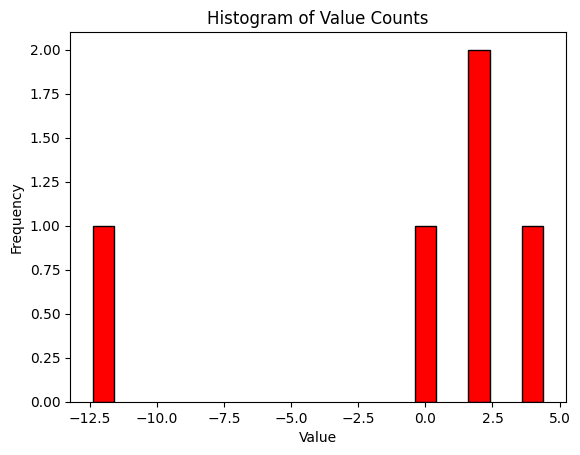

In [45]:
plt.bar(vc.index, vc.values, width=0.8, color="red", edgecolor="black")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Value Counts")
plt.show()

## Data Frames

In [47]:
df = pd.DataFrame({"a": [1, 2, 3], "b": [4, 5, 6], "c": [7, 8, 9]})
df

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


In [82]:
df = pd.read_csv("../datasets/dataset_stop_and_searchA.csv")
df.head(3)

,Gender,Age,Suspect-ethnicity,Officer-ethnicity,Object-of-search,Outcome
0,Male,NaN,Other ethnic group - Not stated,Black,Offensive weapons,A no further action disposal
1,Male,18-24,Other ethnic group - Not stated,Asian,Controlled drugs,A no further action disposal
2,Male,18-24,Other ethnic group - Not stated,Asian,Controlled drugs,A no further action disposal


In [61]:
df.shape

(40, 6)

In [62]:
df.dtypes

Gender               object
Age                  object
Suspect-ethnicity    object
Officer-ethnicity    object
Object-of-search     object
Outcome              object
dtype: object

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             40 non-null     object
 1   Age                36 non-null     object
 2   Suspect-ethnicity  40 non-null     object
 3   Officer-ethnicity  40 non-null     object
 4   Object-of-search   40 non-null     object
 5   Outcome            40 non-null     object
dtypes: object(6)
memory usage: 2.0+ KB


In [64]:
df.describe()

,Gender,Age,Suspect-ethnicity,Officer-ethnicity,Object-of-search,Outcome
count,40,36,40,40,40,40
unique,2,4,10,4,4,3
top,Male,18-24,Other ethnic group - Not stated,Black,Controlled drugs,A no further action disposal
freq,37,22,12,16,22,24


In [75]:
# to access a row, use iloc - uncommonly used
df.iloc[3]

Gender                                          Male
Age                                            18-24
Suspect-ethnicity    Other ethnic group - Not stated
Officer-ethnicity                              Asian
Object-of-search                    Controlled drugs
Outcome                         Community resolution
Name: 3, dtype: object

In [76]:
# can also use
df.loc[3]

Gender                                          Male
Age                                            18-24
Suspect-ethnicity    Other ethnic group - Not stated
Officer-ethnicity                              Asian
Object-of-search                    Controlled drugs
Outcome                         Community resolution
Name: 3, dtype: object

`df.iloc` uses position (i.e. indexing),
`df.loc` uses label

In [78]:
df[df["Officer-ethnicity"] == "Black"]

,Gender,Age,Suspect-ethnicity,Officer-ethnicity,Object-of-search,Outcome
0,Male,NaN,Other ethnic group - Not stated,Black,Offensive weapons,A no further action disposal
9,Male,NaN,Other ethnic group - Any other ethnic group,Black,Controlled drugs,A no further action disposal
11,Female,18-24,Black/African/Caribbean/Black British - Any ot...,Black,Stolen goods,A no further action disposal
12,Male,10-17,Black/African/Caribbean/Black British - African,Black,Offensive weapons,A no further action disposal
15,Male,25-34,Black/African/Caribbean/Black British - Caribbean,Black,Offensive weapons,A no further action disposal
18,Male,25-34,Black/African/Caribbean/Black British - Any ot...,Black,Controlled drugs,A no further action disposal
19,Male,25-34,Other ethnic group - Not stated,Black,Controlled drugs,A no further action disposal
20,Male,18-24,Mixed/Multiple ethnic groups - White and Black...,Black,Controlled drugs,A no further action disposal
22,Female,18-24,White - English/Welsh/Scottish/Northern Irish/...,Black,Controlled drugs,Community resolution
23,Male,18-24,Black/African/Caribbean/Black British - African,Black,Controlled drugs,Arrest


### Boolean logic in data frames
In order to filter data frame rows using and/or/not, you must use different syntax to Python:
- AND: `&`
- OR: `|`
- NOT: `~`

You must also surround each statement using `( )` e.g.

In [80]:
df[(df["Officer-ethnicity"] == "Black") & (df["Age"] == "10-17")]

,Gender,Age,Suspect-ethnicity,Officer-ethnicity,Object-of-search,Outcome
12,Male,10-17,Black/African/Caribbean/Black British - African,Black,Offensive weapons,A no further action disposal
34,Male,10-17,Other ethnic group - Not stated,Black,Controlled drugs,Arrest


If we are trying to use this to filter a data frame and store it in an new df, we should use `.copy()`, this prevents changes to the original dataframe elsewhere impacting the new df. This is safer when you aren't discarding the older pointer. E.g. you name the new df `newDf`

In [83]:
newDf = df[df["Age"].notnull()].copy()

After changing the dataframe, you should run the following to reset the labels to correspond with indexes again:

In [86]:
newDf.head(9)

,Gender,Age,Suspect-ethnicity,Officer-ethnicity,Object-of-search,Outcome
1,Male,18-24,Other ethnic group - Not stated,Asian,Controlled drugs,A no further action disposal
2,Male,18-24,Other ethnic group - Not stated,Asian,Controlled drugs,A no further action disposal
3,Male,18-24,Other ethnic group - Not stated,Asian,Controlled drugs,Community resolution
4,Male,18-24,Other ethnic group - Not stated,Asian,Controlled drugs,Community resolution
5,Male,18-24,Other ethnic group - Not stated,White,Controlled drugs,A no further action disposal
6,Male,18-24,White - Any other White background,White,Controlled drugs,A no further action disposal
7,Male,25-34,Asian/Asian British - Indian,Asian,Stolen goods,Arrest
8,Male,18-24,White - Any other White background,White,Controlled drugs,A no further action disposal
11,Female,18-24,Black/African/Caribbean/Black British - Any ot...,Black,Stolen goods,A no further action disposal


In [88]:
newDf.reset_index(drop=True, inplace=True)

In [90]:
newDf.head(9)

,Gender,Age,Suspect-ethnicity,Officer-ethnicity,Object-of-search,Outcome
0,Male,18-24,Other ethnic group - Not stated,Asian,Controlled drugs,A no further action disposal
1,Male,18-24,Other ethnic group - Not stated,Asian,Controlled drugs,A no further action disposal
2,Male,18-24,Other ethnic group - Not stated,Asian,Controlled drugs,Community resolution
3,Male,18-24,Other ethnic group - Not stated,Asian,Controlled drugs,Community resolution
4,Male,18-24,Other ethnic group - Not stated,White,Controlled drugs,A no further action disposal
5,Male,18-24,White - Any other White background,White,Controlled drugs,A no further action disposal
6,Male,25-34,Asian/Asian British - Indian,Asian,Stolen goods,Arrest
7,Male,18-24,White - Any other White background,White,Controlled drugs,A no further action disposal
8,Female,18-24,Black/African/Caribbean/Black British - Any ot...,Black,Stolen goods,A no further action disposal


In order to delete rows or columns, you can also use `.drop()` instead of filtering.

NB: `axis=1` deletes columns, `axis=0` deletes rows`

In [91]:
newDf.drop("Age", axis=1, inplace=True)

In [93]:
newDf.head(3)

,Gender,Suspect-ethnicity,Officer-ethnicity,Object-of-search,Outcome
0,Male,Other ethnic group - Not stated,Asian,Controlled drugs,A no further action disposal
1,Male,Other ethnic group - Not stated,Asian,Controlled drugs,A no further action disposal
2,Male,Other ethnic group - Not stated,Asian,Controlled drugs,Community resolution


In [94]:
newDf.drop(0, axis=0, inplace=True)

In [117]:
newDf.head(3)

,Gender,Suspect-ethnicity,Officer-ethnicity,Object-of-search,Outcome
1,Male,Other ethnic group - Not stated,Asian,Controlled drugs,A no further action disposal
2,Male,Other ethnic group - Not stated,Asian,Controlled drugs,Community resolution
3,Male,Other ethnic group - Not stated,Asian,Controlled drugs,Community resolution


# Exercise

In [102]:
df = pd.read_csv("../datasets/dataset_stop_and_searchB.csv")

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169418 entries, 0 to 169417
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Gender             167387 non-null  object
 1   Age                154371 non-null  object
 2   Suspect-ethnicity  167433 non-null  object
 3   Officer-ethnicity  166370 non-null  object
 4   Object-of-search   168890 non-null  object
 5   Outcome            169418 non-null  object
dtypes: object(6)
memory usage: 7.8+ MB


In [105]:
df.shape

(169418, 6)

In [113]:
df = df.dropna(axis=0).copy()

In [115]:
df.reset_index(drop=True, inplace=True)

In [120]:
df["Object-of-search"].value_counts()

Object-of-search
Controlled drugs                       87489
Offensive weapons                      29650
Stolen goods                           17866
Evidence of offences under the Act      8059
Anything to threaten or harm anyone     7560
Firearms                                1118
Fireworks                                517
Articles for use in criminal damage      515
Name: count, dtype: int64

In [121]:
df["Suspect-ethnicity"].unique()

array(['Other ethnic group - Not stated',
       'White - Any other White background',
       'Asian/Asian British - Indian',
       'Black/African/Caribbean/Black British - Any other Black/African/Caribbean background',
       'Black/African/Caribbean/Black British - African',
       'Black/African/Caribbean/Black British - Caribbean',
       'Mixed/Multiple ethnic groups - White and Black African',
       'White - English/Welsh/Scottish/Northern Irish/British',
       'Asian/Asian British - Any other Asian background',
       'Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background',
       'Other ethnic group - Any other ethnic group',
       'Asian/Asian British - Bangladeshi',
       'Asian/Asian British - Pakistani',
       'Mixed/Multiple ethnic groups - White and Black Caribbean',
       'White - Irish', 'Mixed/Multiple ethnic groups - White and Asian',
       'Asian/Asian British - Chinese'], dtype=object)

In [137]:
df["Suspect-ethnicity"] = np.where(
    (
        df["Suspect-ethnicity"].str.contains("Mixed")
        | df["Suspect-ethnicity"].str.contains("Other")
    ),
    "Other",
    df["Suspect-ethnicity"],
)

In [138]:
df[df["Suspect-ethnicity"] == "Other"].head(3)

,Gender,Age,Suspect-ethnicity,Officer-ethnicity,Object-of-search,Outcome,Grouped-suspect-ethnicity
0,Male,18-24,Other,Asian,Controlled drugs,A no further action disposal,Other ethnic group - Not stated
1,Male,18-24,Other,Asian,Controlled drugs,A no further action disposal,Other ethnic group - Not stated
2,Male,18-24,Other,Asian,Controlled drugs,Community resolution,Other ethnic group - Not stated


In [139]:
df["Suspect-ethnicity"] = np.where(
    df["Suspect-ethnicity"].str.contains("White"), "White", df["Suspect-ethnicity"]
)

In [140]:
df[df["Suspect-ethnicity"] == "White"].head(3)

,Gender,Age,Suspect-ethnicity,Officer-ethnicity,Object-of-search,Outcome,Grouped-suspect-ethnicity
5,Male,18-24,White,White,Controlled drugs,A no further action disposal,White - Any other White background
7,Male,18-24,White,White,Controlled drugs,A no further action disposal,White - Any other White background
10,Male,over 34,White,White,Evidence of offences under the Act,A no further action disposal,White - Any other White background


In [141]:
df["Suspect-ethnicity"] = np.where(
    df["Suspect-ethnicity"].str.contains("Asian"), "Asian", df["Suspect-ethnicity"]
)

In [142]:
df[df["Suspect-ethnicity"] == "Asian"].head(3)

,Gender,Age,Suspect-ethnicity,Officer-ethnicity,Object-of-search,Outcome,Grouped-suspect-ethnicity
6,Male,25-34,Asian,Asian,Stolen goods,Arrest,Asian/Asian British - Indian
24,Female,18-24,Asian,Asian,Controlled drugs,A no further action disposal,Asian/Asian British - Any other Asian background
26,Male,18-24,Asian,Asian,Controlled drugs,A no further action disposal,Asian/Asian British - Any other Asian background


In [144]:
df["Suspect-ethnicity"] = np.where(
    df["Suspect-ethnicity"].str.contains("Black"), "Black", df["Suspect-ethnicity"]
)

In [145]:
df[df["Suspect-ethnicity"] == "Black"].head(3)

,Gender,Age,Suspect-ethnicity,Officer-ethnicity,Object-of-search,Outcome,Grouped-suspect-ethnicity
8,Female,18-24,Black,Black,Stolen goods,A no further action disposal,Black/African/Caribbean/Black British - Any ot...
9,Male,10-17,Black,Black,Offensive weapons,A no further action disposal,Black/African/Caribbean/Black British - African
12,Male,25-34,Black,Black,Offensive weapons,A no further action disposal,Black/African/Caribbean/Black British - Caribbean
